# Assignment 9

## Questions

### Part 1

1. Use `sklearn.datasets.load_wine` to load wine data

In [1]:
import sklearn.datasets as datasets

wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

2. Show all target names

In [2]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

3. Show all feature names

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Part 2

1. Visualize the data (scatter) with Alcohol as x and Malic Acid as y

Text(0, 0.5, 'Malic acid')

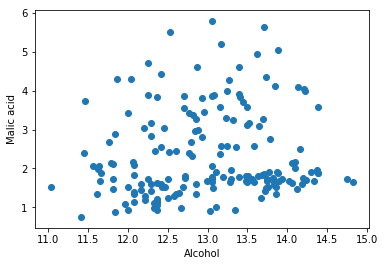

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

alcohol = wine.data[:, 0]
malic_acid = wine.data[:, 1]

plt.scatter(x=alcohol, y=malic_acid)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")


2. Comment on what you see

It's clear from the scatter plot, that the majority of the wines have a malic acid content of about 1-2.

### Part 3

1. Build a perceptron

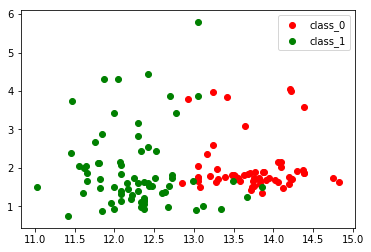

In [5]:
colors = 'rgb'
def scatter_class(data, x_i, y_i, classes=None):
    for idx, target in enumerate(data.target_names):
        if classes == None or idx in classes:
            select = data.data[data.target == idx]
            xs = select[:, x_i]
            ys = select[:, y_i]
            plt.scatter(x=xs, y=ys, c=colors[idx])
            plt.legend(data.target_names)
        
scatter_class(wine, 0, 1, classes=[0, 1])

In [6]:
import numpy as np

def activation_function(x):
    if x < 0:
        return -1
    else:
        return 1

In [7]:
def perceptron(inp, weights):
    dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

In [8]:
def predict(inp_vec, weights):
    class_label = perceptron(inp_vec, weights)
    return class_label

In [9]:
def filtr(data, class_one, class_two):
    return (data.target == class_one) | (data.target == class_two)

In [24]:
def get_training_data(data, x_i, y_i):
    mask = filtr(data, 0, 1)
    filtered_data = np.copy(data.data)[mask]
    class_labels = np.copy(data.target)[mask]
    def f(x):
        return 1 if x == 0 else -1
    class_labels = [f(l) for l in class_labels]
    return [(np.array([d[x_i], d[y_i]]), l) for d, l in zip(filtered_data, class_labels)]

training_data = get_training_data(wine, 0, 1)
training_data[:10]

[(array([14.23,  1.71]), 1),
 (array([13.2 ,  1.78]), 1),
 (array([13.16,  2.36]), 1),
 (array([14.37,  1.95]), 1),
 (array([13.24,  2.59]), 1),
 (array([14.2 ,  1.76]), 1),
 (array([14.39,  1.87]), 1),
 (array([14.06,  2.15]), 1),
 (array([14.83,  1.64]), 1),
 (array([13.86,  1.35]), 1)]

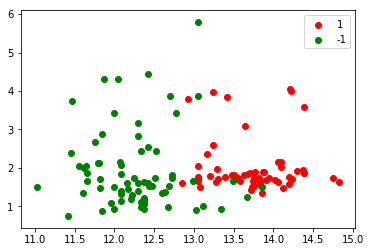

In [11]:
neg = np.array([i[0] for i in training_data if i[1] == -1])
pos = np.array([i[0] for i in training_data if i[1] == 1])
plt.scatter(x=pos[:, 0], y=pos[:, 1], label="1", c='r')
plt.scatter(x=neg[:, 0], y=neg[:, 1], label="-1", c='g')
plt.legend()

In [46]:
def pla(training_data, no_iterations=50000, w_bias=False, eta=0.5):
    # eta is the learning rate
    # initial_error
    error = np.random.random()
    dim = len(training_data[0][0])
    weights = np.random.random(dim)
    weight_history = [np.copy(weights)]

    if w_bias:
        weights = np.random.random(dim + 1)
        data = np.array(list(zip(*training_data))[0])
        biases = np.ones((data.shape[0], 1))
        training_data_w_bias = np.append(data, biases, axis=1)
        
        training_data = list(zip(training_data_w_bias, 
                                 list(zip(*training_data))[1]))
    
    for i in range(no_iterations):
        inp_vec, expected_label = training_data[i % len(training_data)]
        perceptron_output = perceptron(inp_vec, weights)
        error = expected_label - perceptron_output

        weights += eta * error * inp_vec
        weight_history.append(np.copy(weights))

    return weights, np.array(weight_history)
        

learned_weights, weight_history = pla(training_data, no_iterations=5000, w_bias=False)
learned_weights

print(predict(np.array([11.7, 1.5]), learned_weights))
print(predict(np.array([16.7, 1.5]), learned_weights))

-1
-1


In [48]:
def compute_line(weights):
    norm = np.linalg.norm(weights)
    ww = weights / norm
    ww1 = [ww[1], -ww[0]]
    ww2 = [-ww[1] , ww[0]]
                
    # slope and intercept
    m = (ww2[1] - ww1[1]) / (ww2[0] - ww1[0])
    b = ((ww2[0] - ww1[0]) * m) + ww1[1]
    
    return m, b

In [49]:
line = compute_line(learned_weights)
line

(1.2736700747544667, -0.7865405220901363)

In [287]:
scatter_class(wine, 0, 1, classes=[0, 1], w_line=line)

TypeError: scatter_class() got an unexpected keyword argument 'w_line'

## Review Questions

### Part 1

1. Was data loaded and target names and features shown correctly?

### Part 2

1. Was the data visualized in a meaningful way?
2. Does the explaination describe the visualization in an understandable way? If not why not?

### Part 3
1. Was the perceptron correctly used to find the line slicing the feature space?
2. Does the explaination describe the visualization in an understandable way? If not why not?